<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Домашнее задание 6: параметрические тесты
</center>

**ФИО:** Ковель Александр Денисович

## Общая информация

__Дата выдачи:__ 23.04.2025

__Дедлайн:__ 23:59MSK 11.05.2025

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### Задача №1: Лучше найди себе девушку! (25 баллов)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [3]:
df = pd.read_csv('data/dating_is_hard.csv')

__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

Мужчины: 69.1 дюйма
Источник: https://www.cdc.gov/nchs/data/nhsr/nhsr122-508.pdf

Женщины: 63.7 дюйма
Источник: https://www.cdc.gov/nchs/data/nhsr/nhsr122-508.pdf

In [5]:
male_heights = df[df['sex'] == 'm']['height']
female_heights = df[df['sex'] == 'f']['height']

t_stat_male, p_value_male = sts.ttest_1samp(male_heights, popmean=69.1)
print(f"Мужчины: t = {t_stat_male:.3f}, p-value = {p_value_male:.3f}")

t_stat_female, p_value_female = sts.ttest_1samp(female_heights, popmean=63.7)
print(f"Женщины: t = {t_stat_female:.3f}, p-value = {p_value_female:.3f}")

Мужчины: t = 10.238, p-value = 0.000
Женщины: t = 8.370, p-value = 0.000


__Вывод:__ p_value = 0. Отверагаем нулевую гипотезу, что средние рост совпадает.

__б) [10 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

In [6]:
male_drinkers = df[df['sex'] == 'm']['is_heavy_drinker']
female_drinkers = df[df['sex'] == 'f']['is_heavy_drinker']

n_male = len(male_drinkers)
n_female = len(female_drinkers)
count_male = male_drinkers.sum()  
count_female = female_drinkers.sum()  

print(f"Мужчины: {count_male}/{n_male} ({count_male/n_male:.2%})")
print(f"Женщины: {count_female}/{n_female} ({count_female/n_female:.2%})")

Мужчины: 51/600 (8.50%)
Женщины: 31/400 (7.75%)


In [15]:
from statsmodels.stats.proportion import proportions_ztest

counts = [count_male, count_female]
nobs = [n_male, n_female]

z_stat, p_value = proportions_ztest(counts, nobs, alternative='larger')

print(f"Z-статистика: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")

Z-статистика: 0.423
P-value: 0.3360


__Вывод:__ p_value большой, значит отвергаем гипотезу, что мужчин алкоголиков сильно больше. Даешь феминизм в алкоголизме

__в) [10 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

In [16]:
drinkers = df[df['is_heavy_drinker']]
non_drinkers = df[~df['is_heavy_drinker']]

smokers_drinkers = drinkers['smokes'].sum()
smokers_non_drinkers = non_drinkers['smokes'].sum()

n_drinkers = len(drinkers)
n_non_drinkers = len(non_drinkers)

print(f"Алкоголики: {smokers_drinkers}/{n_drinkers} ({smokers_drinkers/n_drinkers:.2%}) курят")
print(f"Трезвенники: {smokers_non_drinkers}/{n_non_drinkers} ({smokers_non_drinkers/n_non_drinkers:.2%}) курят")

Алкоголики: 35/82 (42.68%) курят
Трезвенники: 357/918 (38.89%) курят


In [17]:
counts = [smokers_drinkers, smokers_non_drinkers]
nobs = [n_drinkers, n_non_drinkers]

z_stat, p_value = proportions_ztest(counts, nobs, alternative='larger')

print(f"Z-статистика: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")

Z-статистика: 0.674
P-value: 0.2501


**Вывод:** Исходя из p_value алкоголики не сильно больше курят

### Задача №2. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:** Можно убрать переход на страницу отеля. И сразу сделать кнопку брони. Может быть сделать вообще какую-нибудь самую выгодную бронь, просмотра списка

Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [18]:
df = pd.read_csv("data/ab_simpson.csv")
df.head()

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test


__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

In [19]:
df.isna().sum()

Unnamed: 0      0
user_id         0
sex             0
datetime        0
district        0
hotel_page      0
payment_page    0
payment         0
group           0
dtype: int64

In [20]:
df["sex"].value_counts()

sex
0    200906
1    200901
Name: count, dtype: int64

In [21]:
df["district"].value_counts()

district
Южный федеральный округ              120749
Центральный федеральный округ        120336
Приволжский федеральный округ         60333
Северо-Западный федеральный округ     50071
Уральский федеральный округ           26189
Сибирский федеральный округ           16072
Дальневосточный федеральный округ      8057
Name: count, dtype: int64

In [22]:
print("Распределение по группам:")
print(df["group"].value_counts())

print("\nРаспределение по полу в группах:")
print(pd.crosstab(df["sex"], df["group"]))

print("\nРаспределение по регионам в группах:")
print(pd.crosstab(df["district"], df["group"]))

Распределение по группам:
group
test       201935
control    199872
Name: count, dtype: int64

Распределение по полу в группах:
group  control    test
sex                   
0        99991  100915
1        99881  101020

Распределение по регионам в группах:
group                              control   test
district                                         
Дальневосточный федеральный округ     1999   6058
Приволжский федеральный округ        23985  36348
Северо-Западный федеральный округ    39974  10097
Сибирский федеральный округ           7994   8078
Уральский федеральный округ           5996  20193
Центральный федеральный округ        79949  40387
Южный федеральный округ              39975  80774


Равномерно распределены группы. Поэтому ок

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [24]:
conv_by_district = df.groupby('district').agg(
    total_users=('user_id', 'count'),
    payment_page_conversion=('payment_page', 'mean'),
    payment_conversion=('payment', 'mean')
).reset_index()

print(conv_by_district.sort_values('payment_conversion', ascending=False))

                            district  total_users  payment_page_conversion  \
4        Уральский федеральный округ        26189                 0.438543   
0  Дальневосточный федеральный округ         8057                 0.175251   
6            Южный федеральный округ       120749                 0.806690   
1      Приволжский федеральный округ        60333                 0.630120   
3        Сибирский федеральный округ        16072                 0.310042   
5      Центральный федеральный округ       120336                 0.910068   
2  Северо-Западный федеральный округ        50071                 0.704040   

   payment_conversion  
4            0.309748  
0            0.309296  
6            0.307555  
1            0.301742  
3            0.288514  
5            0.277772  
2            0.267940  


Неохотно люди едут на восток, видимо очень дорого, также в Сибирь тоже не оч.

__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [26]:

funnel_by_group = df.groupby('group').agg(
    total_users=('user_id', 'count'),
    payment_page_conversion=('payment_page', 'mean'),
    payment_conversion=('payment', 'mean')
).reset_index()

print(funnel_by_group)

     group  total_users  payment_page_conversion  payment_conversion
0  control       199872                 0.756999            0.250170
1     test       201935                 0.726803            0.333885


payment_page_conversion - Нет

__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

In [27]:
region_distribution = pd.crosstab(df['district'], df['group'], normalize='index') * 100
print("Доля пользователей из каждого региона в группах A и B (%):")
print(region_distribution)

region_counts = pd.crosstab(df['district'], df['group'])
print("\nАбсолютное количество пользователей по регионам:")
print(region_counts)

Доля пользователей из каждого региона в группах A и B (%):
group                                control       test
district                                               
Дальневосточный федеральный округ  24.810724  75.189276
Приволжский федеральный округ      39.754363  60.245637
Северо-Западный федеральный округ  79.834635  20.165365
Сибирский федеральный округ        49.738676  50.261324
Уральский федеральный округ        22.895109  77.104891
Центральный федеральный округ      66.438140  33.561860
Южный федеральный округ            33.105864  66.894136

Абсолютное количество пользователей по регионам:
group                              control   test
district                                         
Дальневосточный федеральный округ     1999   6058
Приволжский федеральный округ        23985  36348
Северо-Западный федеральный округ    39974  10097
Сибирский федеральный округ           7994   8078
Уральский федеральный округ           5996  20193
Центральный федеральный округ        

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'> 

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:** за счет улучшения результата проблемных регионов просели, основные денежные регионы

## Задача №3: Не подглядывать! (50 баллов)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [28]:
mu_A = 100     
sigma_A = 40   
sigma_B = 20   
MDE = 5          
alpha = 0.05    
beta = 0.20     
power = 1 - beta 

z_alpha = sts.norm.ppf(1 - alpha/2) 
z_beta = sts.norm.ppf(power)

daily_users = 200
users_per_group_per_day = daily_users // 2

In [30]:
import math
n_per_group = ((sigma_A**2 + sigma_B**2) * (z_alpha + z_beta)**2) / (MDE**2)
n_per_group = math.ceil(n_per_group)  

print(f"Необходимый размер выборки на одну группу: {n_per_group} пользователей")

Необходимый размер выборки на одну группу: 628 пользователей


In [31]:
total_users = 2 * n_per_group

days_needed = math.ceil(n_per_group / users_per_group_per_day)

print(f"Общий размер выборки: {total_users} пользователей")
print(f"Длительность теста: {days_needed} дней")

Общий размер выборки: 1256 пользователей
Длительность теста: 7 дней


__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [32]:
mu_A = 100 
mu_B = 105  
sigma_A = 40  
sigma_B = 20 

n_per_group = 100 

group_A = np.random.normal(loc=mu_A, scale=sigma_A, size=n_per_group)
group_B = np.random.normal(loc=mu_B, scale=sigma_B, size=n_per_group)

df_day = pd.DataFrame({
    'group': ['A'] * n_per_group + ['B'] * n_per_group,
    'metric': np.concatenate([group_A, group_B])
})

print(df_day.groupby('group')['metric'].describe())

       count        mean        std        min        25%         50%  \
group                                                                   
A      100.0   97.205341  44.941419  -4.023950  64.613651   90.260807   
B      100.0  102.894578  21.354899  57.179627  87.161019  103.722724   

              75%         max  
group                          
A      136.217316  221.867660  
B      114.389791  153.003828  


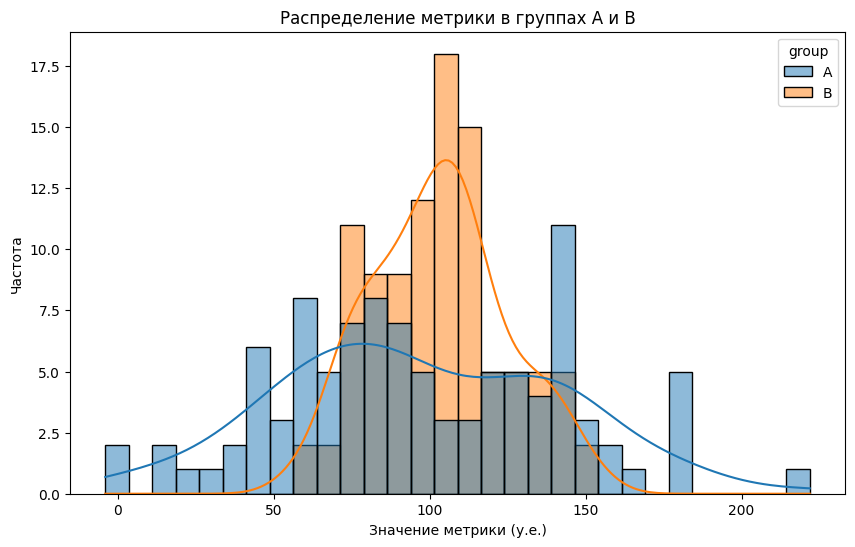

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_day, x='metric', hue='group', kde=True, bins=30)
plt.title('Распределение метрики в группах A и B')
plt.xlabel('Значение метрики (у.е.)')
plt.ylabel('Частота')
plt.show()

In [34]:
t_stat, p_value = sts.ttest_ind(group_A, group_B, equal_var=False)

print(f"Результат t-теста:\n t-статистика = {t_stat:.3f}\n p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем H0: разница между группами статистически значима")
else:
    print("Не отвергаем H0: разница незначима")

Результат t-теста:
 t-статистика = -1.143
 p-value = 0.2548
Не отвергаем H0: разница незначима


2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [35]:
def simulate_ab_test(days: int, users_per_group_per_day: int = 100) -> pd.DataFrame:
    mu_A = 100 
    mu_B = 105 
    sigma_A = 40 
    sigma_B = 20  

    results = {
        'day': [],
        'mean_A': [],
        'mean_B': [],
        'p_value': []
    }

    cumulative_A = np.array([])
    cumulative_B = np.array([])

    for day in range(1, days + 1):
        daily_A = np.random.normal(loc=mu_A, scale=sigma_A, size=users_per_group_per_day)
        daily_B = np.random.normal(loc=mu_B, scale=sigma_B, size=users_per_group_per_day)

        cumulative_A = np.concatenate([cumulative_A, daily_A])
        cumulative_B = np.concatenate([cumulative_B, daily_B])

        mean_A = np.mean(cumulative_A)
        mean_B = np.mean(cumulative_B)
        _, p_value = sts.ttest_ind(cumulative_A, cumulative_B, equal_var=False)

        results['day'].append(day)
        results['mean_A'].append(mean_A)
        results['mean_B'].append(mean_B)
        results['p_value'].append(p_value)

    return pd.DataFrame(results)

ab_test_results = simulate_ab_test(days=50)
print(ab_test_results.tail())

    day     mean_A      mean_B       p_value
45   46  99.579760  105.175251  7.448843e-17
46   47  99.592608  105.221821  2.363953e-17
47   48  99.653960  105.178282  4.859904e-17
48   49  99.619540  105.148150  2.169787e-17
49   50  99.667395  105.144319  1.910197e-17


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

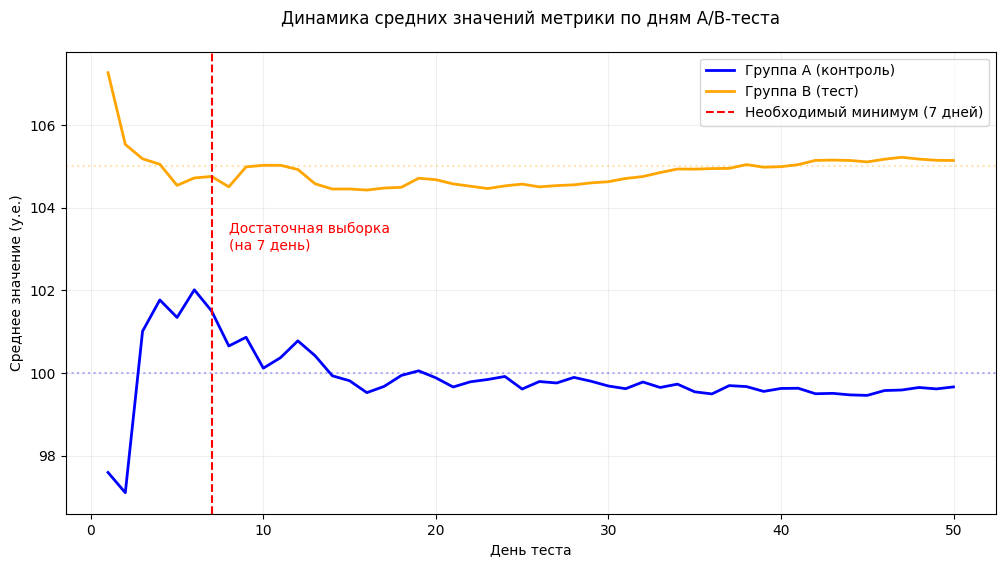

In [36]:
required_days = 7 

plt.figure(figsize=(12, 6))

plt.plot(ab_test_results['day'], ab_test_results['mean_A'], label='Группа A (контроль)', color='blue', linewidth=2)
plt.plot(ab_test_results['day'], ab_test_results['mean_B'], label='Группа B (тест)', color='orange', linewidth=2)

plt.axvline(x=required_days, color='red', linestyle='--', linewidth=1.5, label=f'Необходимый минимум ({required_days} дней)')

plt.axhline(y=100, color='blue', linestyle=':', alpha=0.3)
plt.axhline(y=105, color='orange', linestyle=':', alpha=0.3)

plt.title('Динамика средних значений метрики по дням A/B-теста', pad=20)
plt.xlabel('День теста')
plt.ylabel('Среднее значение (у.е.)')
plt.grid(alpha=0.2)
plt.legend()

plt.text(required_days+1, 103, f'Достаточная выборка\n(на {required_days} день)', color='red', ha='left')

plt.show()


4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

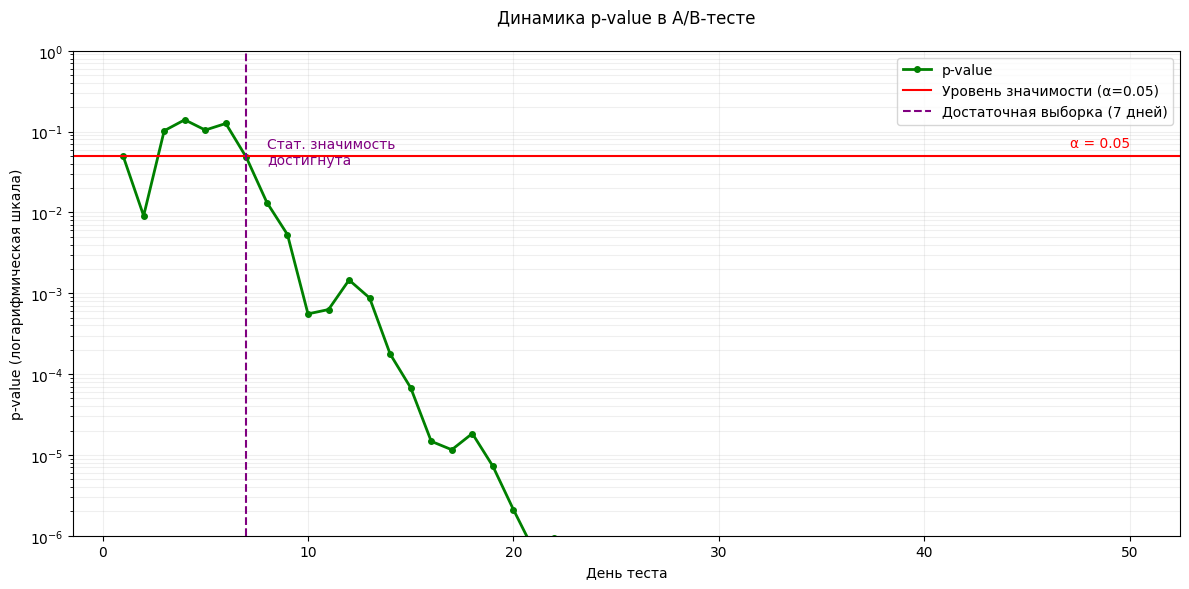

In [37]:
plt.figure(figsize=(12, 6))

plt.semilogy(ab_test_results['day'], ab_test_results['p_value'], label='p-value', color='green', linewidth=2, marker='o', markersize=4)

alpha = 0.05
plt.axhline(y=alpha, color='red', linestyle='-', linewidth=1.5, label=f'Уровень значимости (α={alpha})')

required_days = 7
plt.axvline(x=required_days, color='purple', linestyle='--', linewidth=1.5, label=f'Достаточная выборка ({required_days} дней)')

plt.title('Динамика p-value в A/B-тесте', pad=20)
plt.xlabel('День теста')
plt.ylabel('p-value (логарифмическая шкала)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()

plt.text(required_days+1, alpha*0.8, f'Стат. значимость\nдостигнута', color='purple', ha='left')
plt.text(50, alpha*1.2, f'α = {alpha}', color='red', ha='right', va='bottom')

plt.ylim(10e-7, 1)

plt.tight_layout()
plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

1.

p-value демонстрирует хаотичные колебания

Иногда можнет упасть ниже 0.05, что ломает гипотезу

Скорее всего, из-за маленькой выборки, из-за чего не работает ЗБЧ

2.

Среднее значение 0.04. Разрброс от 0.0004 до 0.08

Формула дает точку перелома. Требуется больше дней для устойчивых результатов

3.

Монотонно уменьшается p-value

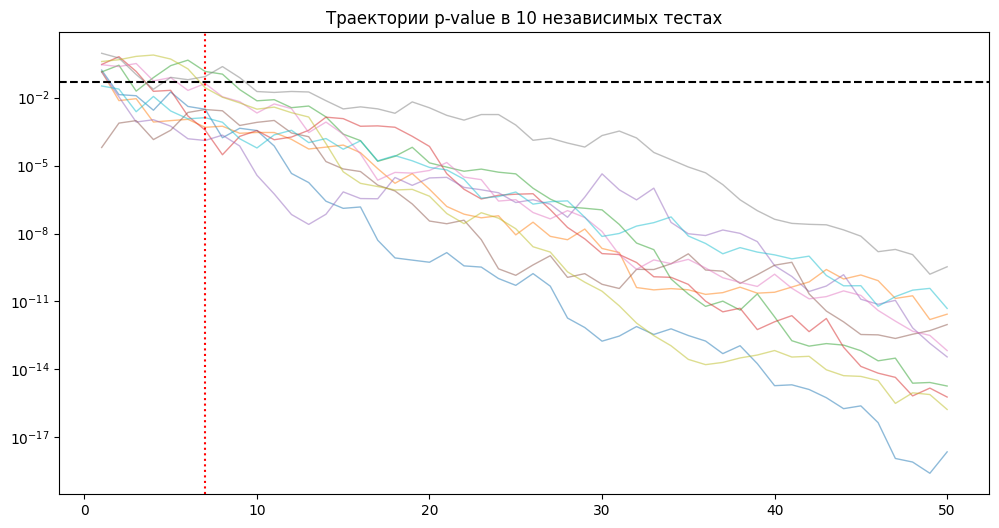

In [38]:
plt.figure(figsize=(12,6))
for i in range(10):
    df = simulate_ab_test(50)
    plt.semilogy(df['day'], df['p_value'], alpha=0.5, linewidth=1)
plt.axhline(0.05, color='black', linestyle='--')
plt.axvline(7, color='red', linestyle=':')
plt.title('Траектории p-value в 10 независимых тестах')
plt.show()

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [39]:
def simulate_small_mde(days=50):
    results = {'day': [], 'mean_A': [], 'mean_B': [], 'p_value': []}
    cum_A, cum_B = np.array([]), np.array([])
    
    for day in range(1, days+1):
        daily_A = np.random.normal(100, 40, 100)
        daily_B = np.random.normal(101, 20, 100)
        
        cum_A = np.concatenate([cum_A, daily_A])
        cum_B = np.concatenate([cum_B, daily_B])
        
        _, pval = stats.ttest_ind(cum_A, cum_B, equal_var=False)
        results['day'].append(day)
        results['mean_A'].append(np.mean(cum_A))
        results['mean_B'].append(np.mean(cum_B))
        results['p_value'].append(pval)
    
    return pd.DataFrame(results)

df_small = simulate_small_mde()

In [41]:
df_small

,day,mean_A,mean_B,p_value
0,1,98.763959,97.178937,0.701639
1,2,100.397266,97.660701,0.388438
2,3,99.461097,98.386798,0.683521
3,4,99.073386,99.827146,0.739255
4,5,100.204511,100.149412,0.978479
5,6,100.271978,99.908720,0.844791
6,7,100.086200,100.529353,0.795442
7,8,100.491737,100.594343,0.948783
8,9,100.058031,100.489345,0.773788
9,10,100.084986,100.269044,0.897222


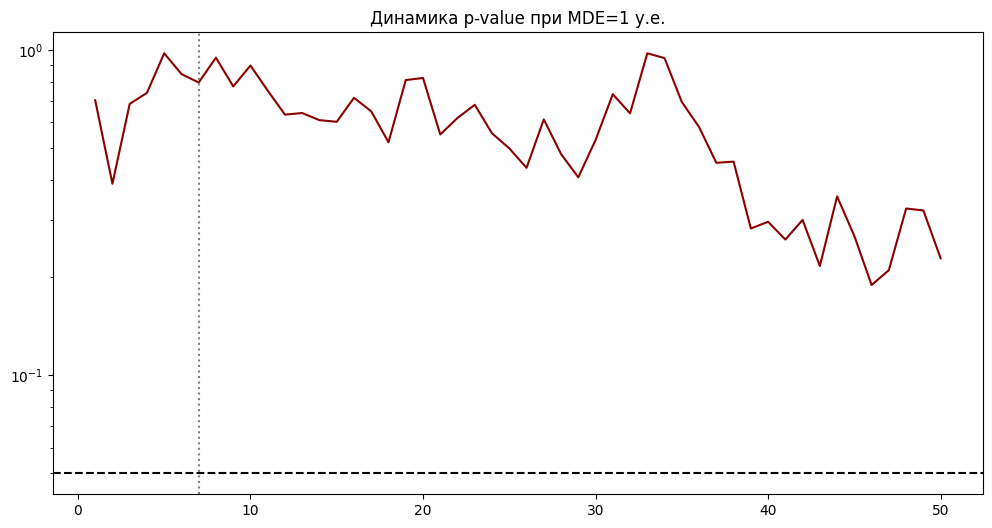

In [40]:
plt.figure(figsize=(12,6))
plt.semilogy(df_small['day'], df_small['p_value'], color='darkred')
plt.axhline(0.05, color='black', linestyle='--')
plt.axvline(7, color='grey', linestyle=':')
plt.title('Динамика p-value при MDE=1 у.е.')
plt.show()

На 7 день p_value > 0.05, и формула из п.1 не работает

Стабилизация не происходит за 50 дней

__в) [20 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

In [42]:
def simulate_aa_test(days=50, users_per_day=100):
    results = {'day': [], 'p_value': []}
    data_A = np.array([])
    data_B = np.array([])
    
    for day in range(1, days+1):
        # Генерация данных (одинаковые распределения)
        daily_A = np.random.normal(100, 40, users_per_day)
        daily_B = np.random.normal(100, 20, users_per_day)  # σ_B=20 как в оригинале
        
        data_A = np.concatenate([data_A, daily_A])
        data_B = np.concatenate([data_B, daily_B])
        
        _, pval = stats.ttest_ind(data_A, data_B, equal_var=False)
        results['day'].append(day)
        results['p_value'].append(pval)
    
    return pd.DataFrame(results)

aa_results = simulate_aa_test()

In [43]:
aa_results

,day,p_value
0,1,0.074089
1,2,0.453579
2,3,0.168752
3,4,0.531901
4,5,0.777528
5,6,0.211479
6,7,0.465341
7,8,0.199452
8,9,0.090960
9,10,0.030500


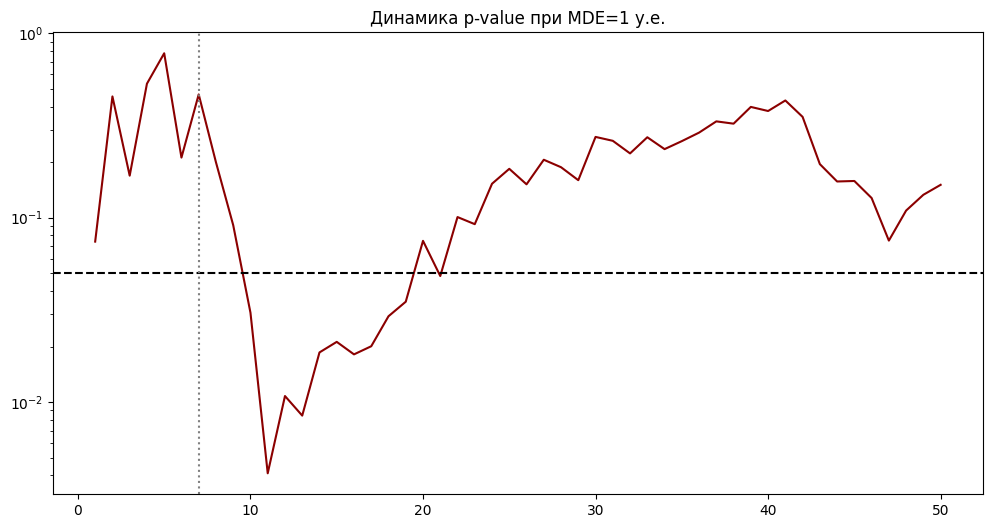

In [44]:
plt.figure(figsize=(12,6))
plt.semilogy(aa_results['day'], aa_results['p_value'], color='darkred')
plt.axhline(0.05, color='black', linestyle='--')
plt.axvline(7, color='grey', linestyle=':')
plt.title('Динамика p-value при MDE=1 у.е.')
plt.show()

Да, может

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [45]:
def generate_aa_pvalue(n_users_per_group):
    group_A = np.random.normal(loc=100, scale=40, size=n_users_per_group)
    group_B = np.random.normal(loc=100, scale=20, size=n_users_per_group)
    _, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
    return p_value

n_users = 7 * 100 
p_values = [generate_aa_pvalue(n_users) for _ in range(1000)]

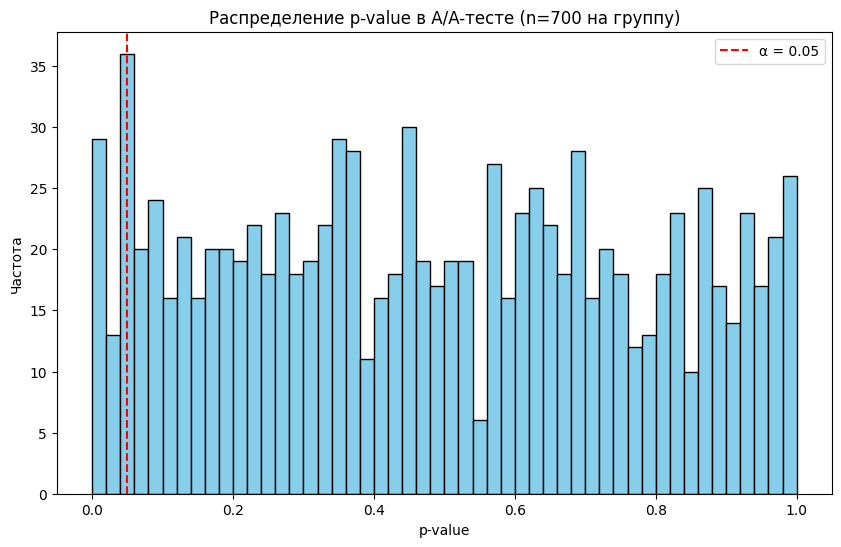

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=0.05, color='red', linestyle='--', label='α = 0.05')
plt.title('Распределение p-value в A/A-тесте (n=700 на группу)')
plt.xlabel('p-value')
plt.ylabel('Частота')
plt.legend()
plt.show()


Значения равномерно заполняют диапазон [0, 1]

Доля p-value < 0.05 составила около 5 процентов

Распределение p-value соответствует теоретическому